#### Importing Libraries

In [14]:
#pip install --upgrade numpy --user

In [15]:
#%pip install --upgrade Pillow --user

In [16]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [17]:
# General

import numpy as np
import pandas as pd
import re
import os
import pickle

# EDA

import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter

# NLP

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# ML

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

In [18]:
# reading data

#data = pd.read_csv(r'C:\\Users\\snanda026\\Desktop\\Assignment\\DS Final Assignment\\SMS SPAM DATA\\SMSSpamCollection',sep='\t',header=None)
data = pd.read_csv(r'/content/SMSSpamCollection',sep='\t',header=None)
data.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
#Rename Columns
data.columns = ['label','text_message']
data.head()

,label,text_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Exploratory Data Analysis (EDA)**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   label         5572 non-null   object
 1   text_message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


There are total 5572 SMS in this dataset with 2 columns label and text_message.

In [21]:
# check missing values

data.isna().sum()

label           0
text_message    0
dtype: int64

In [22]:
data.describe()

,label,text_message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


- There is two unique labels.
- There are some repeated messages as unique is less that the count due to some comman messages.

In [23]:
data.groupby('label').describe().T

label                                   ham  \
text_message count                     4825   
             unique                    4516   
             top     Sorry, I'll call later   
             freq                        30   

label                                                             spam  
text_message count                                                 747  
             unique                                                653  
             top     Please call our customer service representativ...  
             freq                                                    4

- 4825 ham messages out of which 4516 are unique..
- 747 span messages out of which 653 are unique.
- "Sorry, I'll call later" is the most popular ham message with repetition of 30 times.
- "Please call our customer service representativ..." is the most popular spam message with repetition 4 times.

In [24]:
#Creating Copy
data_01 = data.copy()
data_01['length'] = data_01['text_message'].apply(len)
data_01.head()

,label,text_message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
data_01.length.describe()

count    5572.000000
mean       80.490309
std        59.944527
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [26]:
data_01['no_of_chars'] = data_01['text_message'].apply(len)
data_01['no_of_words'] = data_01['text_message'].apply(lambda x: len(nltk.word_tokenize(x)))
data_01['no_of_sents'] = data_01['text_message'].apply(lambda x: len(nltk.sent_tokenize(x)))
data_01['Temp'] = data_01['label'].map({'ham': 0, 'spam': 1})

data_01.head()

,label,text_message,length,no_of_chars,no_of_words,no_of_sents,Temp
0,ham,"Go until jurong point, crazy.. Available only ...",111,111,24,2,0
1,ham,Ok lar... Joking wif u oni...,29,29,8,2,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,37,2,1
3,ham,U dun say so early hor... U c already then say...,49,49,13,1,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,61,15,1,0


#### Data Visualization

<Axes: ylabel='Frequency'>

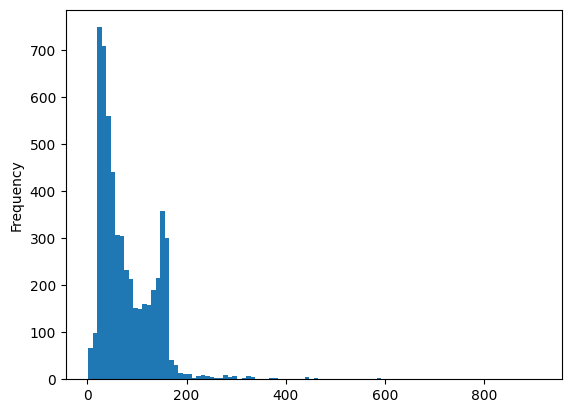

In [27]:
data_01['length'].plot(bins=100, kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

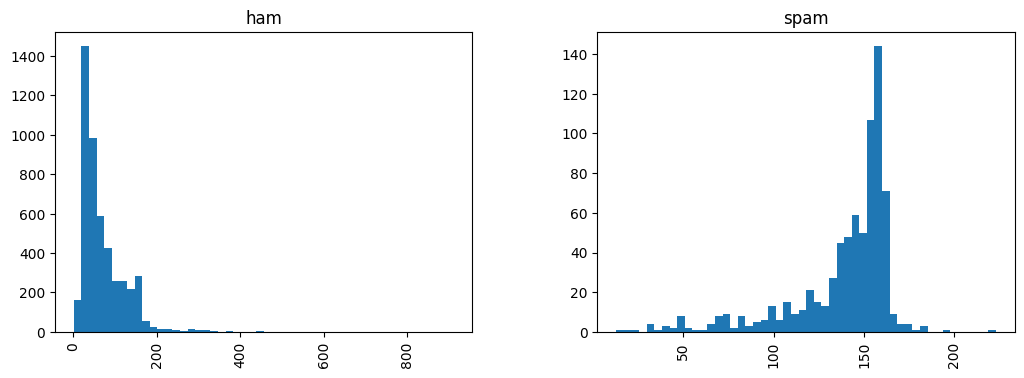

In [28]:
data_01.hist(column='length', by='label', bins=50,figsize=(12,4))

In [29]:
temp = pd.DataFrame()
temp['Target'] = ['Ham','Spam']
temp['Count'] = [len(data_01[data_01['label'] == 'ham']), len(data_01[data_01['label'] == 'spam'])]
temp = temp.sort_values(by = ['Target'], ascending = False)
fig = px.bar(temp, x = 'Target', y = 'Count',
             color = "Target", text_auto='', width = 600,
             color_discrete_sequence = ["#AB63FA", "orange"],
             template = 'plotly_dark',
            title = "Count Plot")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_traces(textfont_size=12, textangle = 0, textposition = "outside", cliponaxis = False)
fig.show()

In [30]:
fig = px.pie(temp, values = 'Count', names = 'Target', width = 600,
             color = 'Target', color_discrete_map = {'Ham': 'rgb(166, 216, 84)', 'Spam': 'rgb(228, 26, 28)'},
             template = 'plotly_dark', title = "Pie Chart")
fig.show()

In [31]:
fig = px.histogram(data_01, x = 'no_of_chars', color = 'label',
                   template = 'plotly_dark',
                   title = "Histogram for HAM vs SPAM based on Number of Characters per Message")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()


In [32]:
fig = px.histogram(data_01, x = 'no_of_words', color = 'label',
                   template = 'plotly_dark',
                   title = "Histogram for HAM vs SPAM based on Number of Words per Message")

fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

In [33]:
fig = px.histogram(data_01, x = 'no_of_sents', color = 'label', template = 'plotly_dark', title = "Histogram for HAM vs SPAM based on Number of Sentences per Message")
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False)
fig.update_layout(barmode = 'overlay')
fig.show()

In [34]:
fig = px.scatter_matrix(data_01, dimensions=["no_of_chars", "no_of_words", "no_of_sents"],
                        color = "label", template = 'plotly_dark',
                        color_discrete_map = {'ham': '#19D3F3', 'spam': '#FF9900'},
                        title = "Pair Plot")
fig.show()

**Correlation Matrix**

In [35]:
fig = px.imshow(data_01.corr(), text_auto = True, color_continuous_scale = 'blues', template = 'plotly_dark', title = "Correlation Matrix")
fig.show()

<ipython-input-35-cfe879aa808c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**Data Cleaning**

- Removing special character and numbers using regular expression
- Converting the entire sms into lower case
- Tokenizing the sms by words
- Removing the stop words
- Lemmatizing the words
- Joining the lemmatized words
- Building a corpus of messages

![image.png](attachment:image.png)

**Common Function**

In [36]:
def word_count_plot(data, title):
    word_counter = Counter([word for sentence in data for word in sentence.split()])
    most_count = word_counter.most_common(25)
    most_count = pd.DataFrame(most_count, columns = ['Word', 'Count']).sort_values(by = "Count")
    most_count = most_count.sort_values(by = 'Count', ascending = False)

    fig = px.bar(most_count, x = 'Word', y = 'Count', color = "Count", text_auto = '', template = 'plotly_dark', title = title)
    fig.update_xaxes(showgrid = False)
    fig.update_yaxes(showgrid = False, showticklabels = False)
    fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)
    fig.show()

In [37]:
# Word Count Plot before Stemming

word_count_plot(data_01["text_message"], "Word Count Plot Before Stemming")

In [38]:
# Creating Corpus

corpus = []
ps = PorterStemmer()

for i in range(len(data_01)):
    msg = re.sub('[^a-zA-Z]', ' ', data_01['text_message'][i])
    msg = msg.lower()
    msg = msg.split()
    msg = [ps.stem(word) for word in msg if not word in stopwords.words('english')] # Stemming & Stopwords Removal
    msg = ' '.join(msg)
    corpus.append(msg)

for i in range(0, 5):
    print("Sentence {}: {}".format(i+1,corpus[i]))

Sentence 1: go jurong point crazi avail bugi n great world la e buffet cine got amor wat
Sentence 2: ok lar joke wif u oni
Sentence 3: free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli
Sentence 4: u dun say earli hor u c alreadi say
Sentence 5: nah think goe usf live around though


In [39]:
data_01['corpus'] = corpus
data_01.head()

,label,text_message,length,no_of_chars,no_of_words,no_of_sents,Temp,corpus
0,ham,"Go until jurong point, crazy.. Available only ...",111,111,24,2,0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,29,8,2,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,37,2,1,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,49,49,13,1,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,61,15,1,0,nah think goe usf live around though


In [40]:
# Word Count Plot after Stemming

word_count_plot(corpus, "Word Count Plot After Stemming")

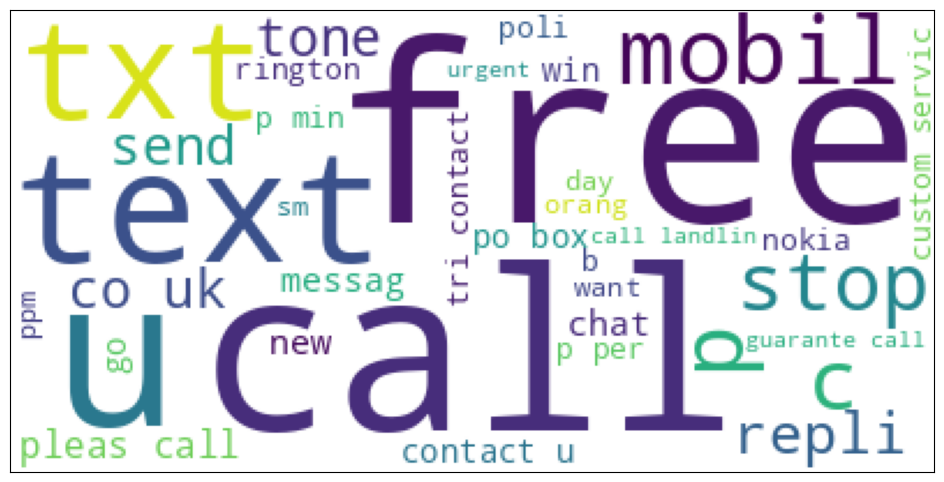

In [41]:
# Word Cloud Analysis on Corpus for Spam Messages

plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(data_01[data_01['label'] == 'spam']['corpus'].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(spam_wc);


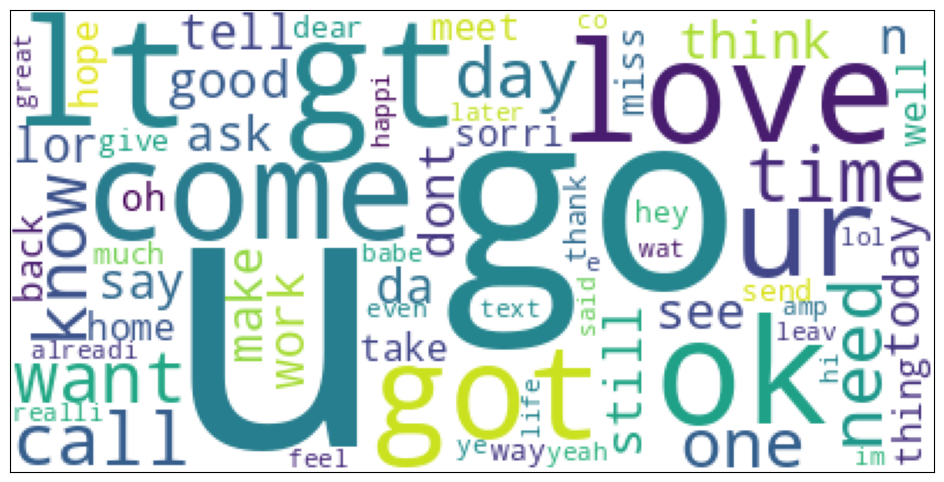

In [42]:
# Word Cloud Analysis on Corpus for Ham Messages

plt.figure(figsize = (24, 6))
wc = WordCloud(min_font_size = 10, background_color = 'white')
ham_wc = wc.generate(data_01[data_01['label'] == 'ham']['corpus'].str.cat(sep = " "))
plt.xticks([])
plt.yticks([])
plt.imshow(ham_wc);

In [43]:
# Count Plot for Spam Words

spam_corpus = []

for msg in data_01[data_01['label'] == 'spam']['corpus'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

temp = pd.DataFrame(Counter(spam_corpus).most_common(20), columns = ['Word', 'Count'])

fig = px.bar(temp, x = 'Word', y = 'Count', color = "Count", text_auto = '', template = 'plotly_dark', title = 'Count Plot for Spam Words')
fig.update_xaxes(showgrid = False)
fig.update_yaxes(showgrid = False, showticklabels = False)
fig.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)
fig.show()


In [44]:
# Identify Parts of speech
def identify_pos(text):
    pos_tags = nltk.pos_tag(nltk.word_tokenize(text))
    return pos_tags

In [45]:
data_01['pos_tags'] = data_01['text_message'].apply(identify_pos)

**TF-IDF Vectorizer**

In [46]:
tfidf = TfidfVectorizer(max_features = 3000)
X = tfidf.fit_transform(data_01['corpus']).toarray()
Y = data_01['Temp'].values

In [47]:
# Identify if Parts of speech are an important parameter in spam
def identify_pos_spam(pos_tags):
    spam_pos = ['NN', 'NNP', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    spam_pos_count = sum([1 for word, pos in pos_tags if pos in spam_pos])
    return spam_pos_count

In [48]:
data_01['spam_pos_count'] = data_01['pos_tags'].apply(identify_pos_spam)

In [49]:
data_01.head()

,label,text_message,length,no_of_chars,no_of_words,no_of_sents,Temp,corpus,pos_tags,spam_pos_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,111,24,2,0,go jurong point crazi avail bugi n great world...,"[(Go, NNP), (until, IN), (jurong, JJ), (point,...",11
1,ham,Ok lar... Joking wif u oni...,29,29,8,2,0,ok lar joke wif u oni,"[(Ok, NNP), (lar, NN), (..., :), (Joking, NNP)...",4
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,37,2,1,free entri wkli comp win fa cup final tkt st m...,"[(Free, JJ), (entry, NN), (in, IN), (2, CD), (...",17
3,ham,U dun say so early hor... U c already then say...,49,49,13,1,0,u dun say earli hor u c alreadi say,"[(U, JJ), (dun, NNS), (say, VBP), (so, RB), (e...",6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,61,15,1,0,nah think goe usf live around though,"[(Nah, NNP), (I, PRP), (do, VBP), (n't, RB), (...",6


**Train Test Split**

In [50]:
x_train, x_test, y_train, y_test = train_test_split(data_01['text_message'], Y, test_size = 0.2, random_state = 42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4457,) (1115,) (4457,) (1115,)


**Evaluation Metrics Function**

In [51]:
def evaluation_parametrics(name, y_train, yp_train, y_test, yp_test):

    print("\n-----------------------------{}-----------------------------\n".format(name))

    cm_train = confusion_matrix(y_train, yp_train)
    t1 = ConfusionMatrixDisplay(cm_train)
    s1 = round((cm_train[0,0]/(cm_train[0,0] + cm_train[0,1])),4)

    print("Classification Report for Train Data\n")
    print(classification_report(y_train, yp_train))
    print("--------------------------------------------------------------------------")
    print("Specificity on Train Data: ", s1)
    print("Accuracy on Train Data: ", round(accuracy_score(y_train, yp_train),4))
    print("F1 Score on Train Data: ", round(f1_score(y_train, yp_train),4))
    print("--------------------------------------------------------------------------")

    cm_test = confusion_matrix(y_test, yp_test)
    t2 = ConfusionMatrixDisplay(cm_test)
    s2 = round((cm_test[0,0]/(cm_test[0,0] + cm_test[0,1])),4)

    print("\nClassification Report for Test Data\n")
    print(classification_report(y_test, yp_test))
    print("--------------------------------------------------------------------------")
    print("Specificity on Test Data: ", s2)
    print("Accuracy on Test Data: ", round(accuracy_score(y_test, yp_test), 4))
    print("F1 Score Test Data: ", round(f1_score(y_test, yp_test), 4))
    print("--------------------------------------------------------------------------")

    t1.plot()
    t2.plot()

**BERT**

BERT is an acronym for Bidirectional Encoder Representations from Transformers.

BERT is a deep learning model that has given state-of-the-art results on a wide variety of natural language processing tasks. It stands for Bidirectional Encoder Representations for Transformers. It has been pre-trained on Wikipedia and BooksCorpus and requires task-specific fine-tuning

BERT is a powerful technique for natural language processing that can improve how well computers comprehend human language. The foundation of BERT is the idea of exploiting bidirectional context to acquire complex and insightful word and phrase representations. By simultaneously examining both sides of a word’s context, BERT can capture a word’s whole meaning in its context, in contrast to earlier models that only considered the left or right context of a word. This enables BERT to deal with ambiguous and complex linguistic phenomena including polysemy, co-reference, and long-distance relationships.

For that, the paper also proposed the architecture of different tasks. In this post, we will be using BERT architecture for Sentiment classification tasks specifically the architecture used for the CoLA (Corpus of Linguistic Acceptability) binary classification task.

![image.png](attachment:image.png)

BERT has proposed two versions:

- BERT (BASE): 12 layers of encoder stack with 12 bidirectional self-attention heads and 768 hidden units.
- BERT (LARGE): 24 layers of encoder stack with 24 bidirectional self-attention heads and 1024 hidden units.

For TensorFlow implementation, Google has provided two versions of both the BERT BASE and BERT LARGE: Uncased and Cased. In an uncased version, letters are lowercase before WordPiece tokenization.

In-text classification, the main aim of the model is to categorize a text into one of the predefined categories or labels.

![image.png](attachment:image.png)

In the above image, the output will be one of the categories i.e. 1 or 0 in the case of binary classification. Soon we are going to use the pre-trained BERT model to classify the email text as ham or spam category.

In [56]:
!pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.7 MB/s eta 0:00:00


In [53]:
#!pip install --upgrade protobuf

In [54]:
#pip uninstall protobuf

In [57]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [58]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch

In [59]:
# Create a BERT classifier to predict ham vs spam
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [60]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [61]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [62]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [63]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [64]:
model.fit(x_train, y_train, epochs=2, batch_size = 32)

Epoch 1/2
140/140 [==============================] - 58s 311ms/step - loss: 0.3323 - accuracy: 0.8643
Epoch 2/2
140/140 [==============================] - 53s 378ms/step - loss: 0.2351 - accuracy: 0.8950


In [66]:
model.evaluate(x_test, y_test)

#predict
y_predicted = model.predict(x_test)
y_predicted = y_predicted.flatten()
print(y_predicted)

35/35 [==============================] - 12s 328ms/step
[0.08722506 0.04002209 0.05023326 ... 0.00762516 0.04023033 0.0134757 ]


Ref:

https://www.analyticsvidhya.com/blog/2021/12/text-classification-using-bert-and-tensorflow/
https://medium.com/artificialis/bert-model-for-classification-task-ham-or-spam-email-7dab2c1bd4d7